# Autoencoders

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Convolutional AutoEncoder

In [22]:
import tensorflow as tf
import numpy as np

# Variable initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Layer operations

def conv2d(X, W):
    return tf.nn.conv2d(X, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(X):
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


def resize_images(X, height_factor, width_factor):
    shape = X.get_shape()
    original_shape = tuple([i.__int__() for i in shape])
    
    new_shape = tf.shape(X)[1:3]
    new_shape *= tf.constant(np.array([height_factor, width_factor]).astype('int32'))
    X = tf.image.resize_nearest_neighbor(X, new_shape)
    X.set_shape((None, original_shape[1] * height_factor if original_shape[1] is not None else None,
                original_shape[2] * width_factor if original_shape[2] is not None else None, None))
    return X

def up_sample_2x2(X):
    return resize_images(X, 2, 2)

class Convolution2D:
    def __init__(self, W_shape):
        self.W_shape = W_shape
        self.W = weight_variable(list(self.W_shape))
        self.b = bias_variable([self.W_shape[-1]])
        self.output = None
    
    def __call__(self, X):
        self.output = tf.nn.relu(conv2d(X, self.W) + self.b)
        return self.output

class MaxPooling2D:
    def __init__(self):
        self.output = None
    def __call__(self, X):
        self.output = max_pool_2x2(X) 
        return self.output

class UnPooling2D:
    def __init__(self):
        self.output = None
    def __call__(self, X):
        self.output = up_sample_2x2(X)
        return self.output

class Dense:
    def __init__(self, input_dim=None, output_dim=None):
        self.input_dim = input_dim
        self.output_dim = output_dim
    
    def __call__(self, X):
        self.output = 
    
class EncoderBlock:
    def __init__(self, convolution, pooling):
        self.convolution = convolution
        self.pooling = pooling
    def __call__(self, X)
        return self.pooling(self.convolution(X))
    
class DecoderBlock:
    def __init__(self, convolution=None, unpooling=None):
        self.convolution = convolution
        self.unpooling = unpooling
    def __call__(self, X)
        return self.convolution(self.unpooling(X))
    


def l2_loss(X):
    return tf.reduce_mean(tf.reduce_sum(tf.square(X), axis=(1, 2)))

# Architecture parameters
architecture = {'input_shape':(28, 28, 1), 'filters':[32, 64], 'filters_size':[5, 5], 'dense':[1024, 10], 'dropout':[.0, .0, .5, .0]}

def create_encoder(input_shape, filters, filters_size, **args):
    encoder = []
    nb_filters = len(filters)
    filters = [input_shape[-1]] + filters
    for i in range(nb_filters):
        encoder_block = EncoderBlock()
        encoder_block.convolution = Convolution2D((filters_size[i], filters_size[i], filters[i], filters[i+1])))
        encoder_block.pooling = MaxPooling2D()
        encoder.append(encoder_block)
    return encoder

def create_decoder(input_shape, filters, filters_size, **args):
    decoder = []
    nb_filters = len(filters)
    filters = [input_shape[-1]] + filters
    for i in range(nb_filters):
        decoder_block = DecoderBlock()
        decoder_block.unpooling = UnPooling2D()
        decoder_block.convolution = Convolution2D((filters_size[i], filters_size[i], filters[nb_filters-i], filters[nb_filters-i-1]))
    return decoder

def augmenting_unsupervised(model):
    s_loss = mode
    # layerwise pretraining
    L = len(model.filters)
    for i in range(L)
        decoder_output = create_decoder(model, i)
        loss = 
    
# Begin session

sess = tf.InteractiveSession() 


# Inputs

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

x_image = tf.reshape(x, [-1,28,28,1])

# Encoder
encoder = create_encoder(**architecture)
decoder = create_decoder(**architecture)
autoencoder = encoder + decoder

output = x_image
for layer in autoencoder:
    output = layer(output)
    
# Decoder
'''
h_unpool2 = UnPooling2D()(output)
h_deconv2 = Convolution2D((5, 5, 64, 32))(h_unpool2)

h_unpool1 = UnPooling2D()(h_deconv2)
x_rec = Convolution2D((5, 5, 32, 1))(h_unpool1)
'''

keep_prob = tf.placeholder(tf.float32)

loss = l2_loss(x_image - output)

def fit(loss, labeled_data, unlabeled_data):
    
train_step = tf.train.AdamOptimizer(1e-6).minimize(loss)
sess.run(tf.global_variables_initializer())

for i in range(2000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_loss = loss.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training loss %f"%(i, train_loss))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

res = sess.run([loss, output], feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

print("Testing loss %f"%(res[0]))
sess.close()


'''
# Third dense layer

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout 

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Last classification layer

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
'''


SyntaxError: invalid syntax (<ipython-input-22-46c14ba85f05>, line 88)

Mnist train range 0.000000 1.000000
(10000, 28, 28, 1)
Digit 0 0.000000 1.000000


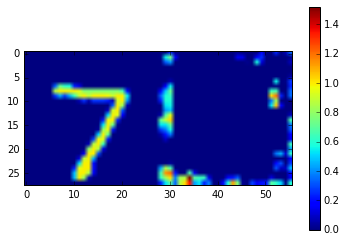

Digit 1 0.000000 1.000000


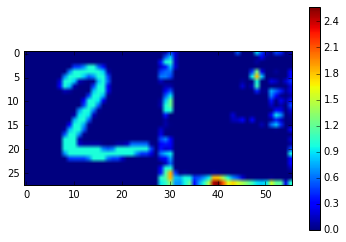

Digit 2 0.000000 1.000000


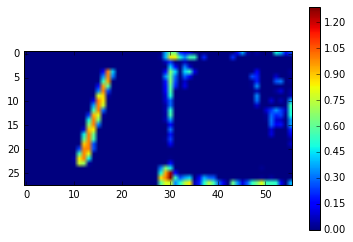

Digit 3 0.000000 1.000000


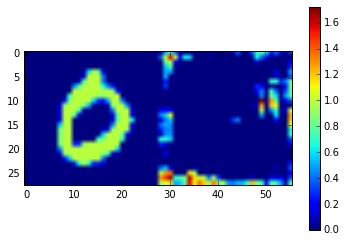

Digit 4 0.000000 1.000000


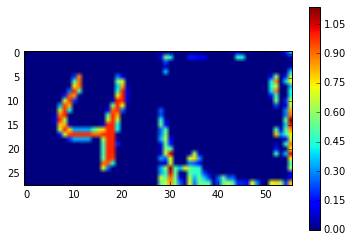

Digit 5 0.000000 0.996078


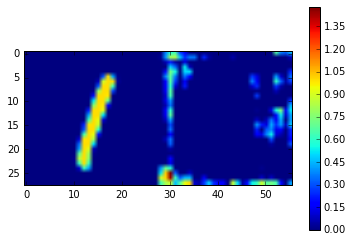

Digit 6 0.000000 1.000000


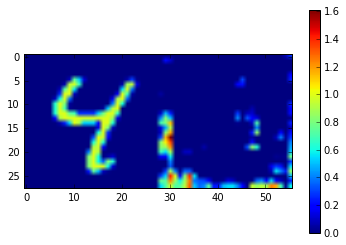

Digit 7 0.000000 1.000000


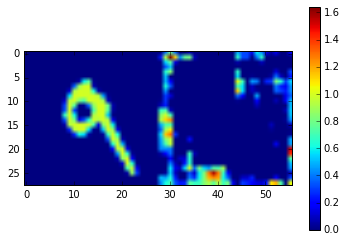

Digit 8 0.000000 1.000000


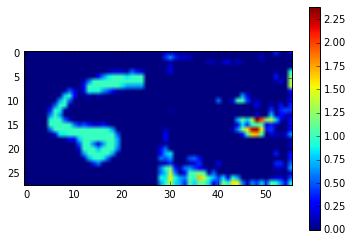

Digit 9 0.000000 1.000000


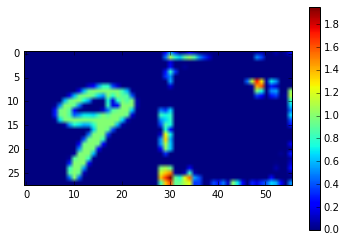

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

images = res[1]
print "Mnist train range %f %f"%(mnist.train.images.min(), mnist.train.images.max())
print(res[1].shape)

for i in range(0, 10):
    im = mnist.test.images[i].reshape((28, 28))
    im_rec = images[i].flatten().reshape((28, 28))
    tmp = np.concatenate((im, im_rec), axis=1)
    plt.imshow(tmp)
    plt.colorbar()
    print "Digit %d %f %f"%(i, im.min(), im.max())
    plt.show()